# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

## Load Cleaned Data

In [ ]:
data = pd.read_csv(here('data/cleaned/cleaned_mbs_reviews.csv'))
data.head(1)

## Plot overall sentiment pie chart

In [ ]:
plt.pie(data['label'].value_counts(), labels=data['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

## Plot Review against Time

In [4]:
timeline = data.groupby('date').count()['traveller_username']

timeline.index = pd.to_datetime(timeline.index)

timeline = timeline.sort_index()

NameError: name 'data' is not defined

In [ ]:
plt.plot(timeline)
plt.title("Time against Number of Reviews")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

## Plot review in Pre, During and Post Covid Time

In [66]:
covid_data = data.dropna(axis=0, subset=['covid'])

covid_data['covid'].value_counts()

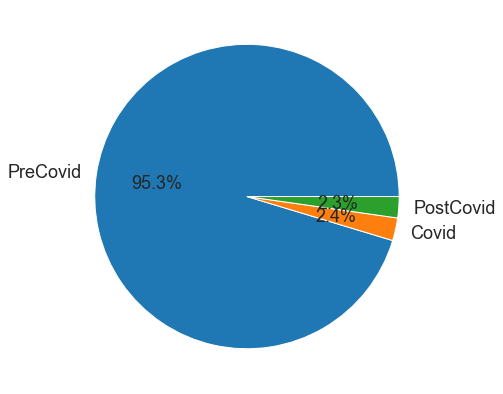

In [68]:
plt.pie(covid_data['covid'].value_counts(), labels=covid_data['covid'].value_counts().index.unique().tolist(), autopct='%1.1f%%')
plt.show()

In [5]:
csvs = os.listdir(r"C:\Nga\BT4222\sentiment_analysis_bt4222\data\cleaned")
csvs

['cleaned_crowne-plaza.csv',
 'cleaned_fullerton.csv',
 'cleaned_grand-mercure-sg-roxy.csv',
 'cleaned_holiday-inn-express-clarke-quay.csv',
 'cleaned_hotel-boss.csv',
 'cleaned_hotel-G.csv',
 'cleaned_ibis-sg-bencoolen.csv',
 'cleaned_mbs_reviews.csv',
 'cleaned_mbs_total.csv',
 'cleaned_pan-pacific.csv',
 'cleaned_paradox-sg-merchant-court.csv',
 'cleaned_park-regis.csv',
 'cleaned_parkroyal-collection-marina-bay.csv',
 'cleaned_swissotel-the-stamford.csv',
 'cleaned_village-hotel-albert-court-by-far-east-hospitality.csv',
 'cleaned_village-hotel-changi-by-far-east-hospitality.csv']

In [6]:
star3 = ['cleaned_ibis-sg-bencoolen.csv','cleaned_hotel-boss.csv','cleaned_hotel-G.csv',
           'cleaned_village-hotel-albert-court-by-far-east-hospitality.csv',
           'cleaned_holiday-inn-express-clarke-quay.csv']
star4 = ['cleaned_village-hotel-changi-by-far-east-hospitality.csv',
         'cleaned_park-regis.csv', 'cleaned_grand-mercure-sg-roxy.csv',
         'cleaned_paradox-sg-merchant-court.csv','cleaned_crowne-plaza.csv']
star5 = ['cleaned_fullerton.csv', 'cleaned_parkroyal-collection-marina-bay.csv', 'cleaned_pan-pacific.csv',
          'cleaned_mbs_total.csv', 'cleaned_swissotel-the-stamford.csv']

In [7]:
ROOT = r'C:\Nga\BT4222\sentiment_analysis_bt4222'
RAW_FOLDER = "data\\cleaned"

In [8]:
import pandas as pd

def combine_csv_to_dataframe(file_names):
    """
    Combine multiple CSV files into a single DataFrame.

    Parameters:
    file_names (list): List of CSV file names.

    Returns:
    pd.DataFrame: Combined DataFrame.
    """
    combined_df = pd.DataFrame()
    
    for file_name in file_names:
        file_name = ROOT + "\\"+RAW_FOLDER + "\\" + file_name
        try:
            df = pd.read_csv(file_name)
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        except FileNotFoundError:
            print(f"File not found: {file_name}")
        except pd.errors.EmptyDataError:
            print(f"Empty or invalid CSV file: {file_name}")
    
    return combined_df


In [11]:
combined_dataframe.columns

Index(['Unnamed: 0', 'date_of_stay', 'traveller_username', 'review_title',
       'review_text', 'travel_type', 'traveller_country_origin',
       'traveller_total_contributions',
       'traveller_total_helpful_contributions', 'rating1', 'rating2', 'rating',
       'valid_rating', 'label', 'cleaned_review', 'combined_review', 'date',
       'covid'],
      dtype='object')

In [17]:
combined_dataframe = combine_csv_to_dataframe(star3)
combined_dataframe[['traveller_username','date','travel_type','traveller_total_contributions','traveller_total_helpful_contributions','review_title','review_text','rating']].head(5)

,traveller_username,date,travel_type,traveller_total_contributions,traveller_total_helpful_contributions,review_title,review_text,rating
0,Love_Life_Sydney,2023-08-01,Trip type: Travelled as a couple,2302.0,871.0,Clean and comfortable,Hotel rooms in Singapore are so expensive so t...,4.0
1,Bilal S,2023-08-01,Trip type: Travelled with family,4.0,NaN,"Good hotel, great location",This is a great place! Location is great but t...,5.0
2,Anthony Fernando,2022-10-01,Trip type: Travelled with friends,39.0,38.0,Good place for a decent price.,Good place good price Easy access to the city...,5.0
3,Mjkc204,2023-08-01,Trip type: Travelled solo,37.0,19.0,Great Location and great staff.,The IBIS was a neat and tidy hotel in line wit...,5.0
4,Aung Nanda,2022-08-01,Trip type: Travelled on business,3.0,4.0,Good for budget stay.,I stayed there for 7 days. It was a nice locat...,4.0


In [31]:
combined_dataframe.covid.value_counts()

PreCovid     25407
PostCovid     1344
Covid          673
Name: covid, dtype: int64

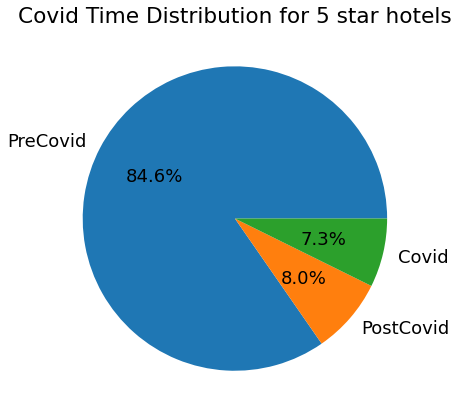

In [27]:
plt.pie(combined_dataframe['covid'].value_counts(), labels=combined_dataframe['covid'].value_counts().index.unique().tolist(), autopct='%1.1f%%')
plt.title("Covid Time Distribution for 5 star hotels")
plt.show()

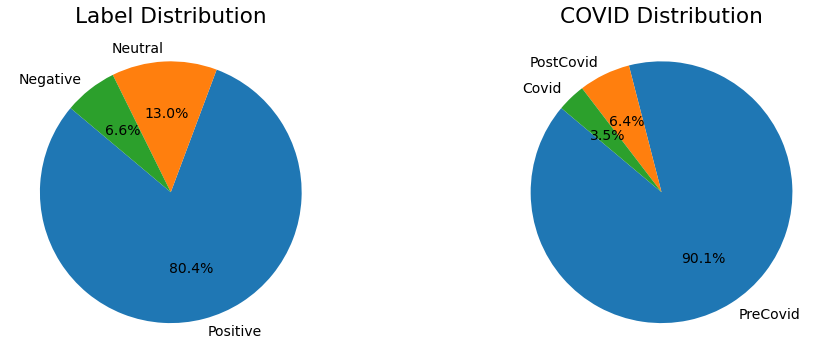

In [104]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
#fig.suptitle('3 star hotels', y=1.02)  # Adjust the y position of the title

# Plot pie chart for label distribution
labels1 = combined_dataframe['label'].value_counts().index
sizes1 = combined_dataframe['label'].value_counts()
threshold1 = 1  # Adjust the threshold for displaying percentages
def func1(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%".format(pct) if pct > threshold1 else ""

axs[0].pie(sizes1, labels=labels1, autopct=lambda pct: func1(pct, sizes1), startangle=140, rotatelabels=False, textprops={'fontsize': 14})
axs[0].set_title("Label Distribution")

# Plot pie chart for COVID combined_dataframe
covid_combined_dataframe = combined_dataframe.dropna(axis=0, subset=['covid'])
labels2 = covid_combined_dataframe['covid'].value_counts().index
sizes2 = covid_combined_dataframe['covid'].value_counts()
threshold2 = 3  # Adjust the threshold for displaying percentages
def func2(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%".format(pct) if pct > threshold2 else ""

axs[1].pie(sizes2, labels=labels2, autopct=lambda pct: func2(pct, sizes2), startangle=140, rotatelabels=False, textprops={'fontsize': 14})
axs[1].set_title("COVID Distribution")

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 0.85, 0.9])  # Adjust the rectangle for the layout
plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between subplots

plt.show()